## Email Spam Detection By Sumit
#### Email/SMS spam, are also called as junk emails/sms, are unsolicited messages sent in bulk by email (spamming).

##### In this Data Science Project I will show you how to detect email spam using Machine Learning technique called Natural Language Processing and Python.

In [1]:
# Import All Library
import numpy as np
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the data and print the first 5 rows :
data_sms = pd.read_csv('spam.csv',encoding='latin-1')
data_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Now let’s explore the data and get the number of rows & columns :
data_sms.shape

(5572, 5)

In [4]:
# Count the columns
data_sms.columns.value_counts()

v2            1
v1            1
Unnamed: 3    1
Unnamed: 2    1
Unnamed: 4    1
dtype: int64

In [5]:
# Drop the unnecessary columns
data_sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1,inplace = True)
data_sms.rename(columns={"v1":"label", "v2":"sms"})
data_sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Count the how many of normal and spam
data_sms["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [7]:
# calculate the leanth of all text that present in "v2"
data_sms['length'] = data_sms['v2'].apply(len)
data_sms.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
# rename the all columns in sutable or readble 
data_sms.rename( columns = {"v1" : "Label" , "v2" : "SMS" , "length" : "Length"},inplace  =True)

In [9]:
data_sms.head()

,Label,SMS,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


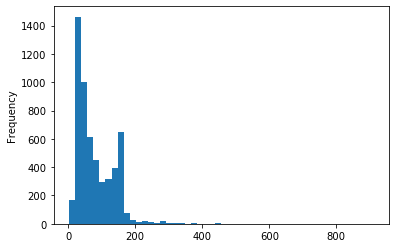

In [10]:
# see the frequescy of text length
data_sms['Length'].plot(bins=50, kind='hist')

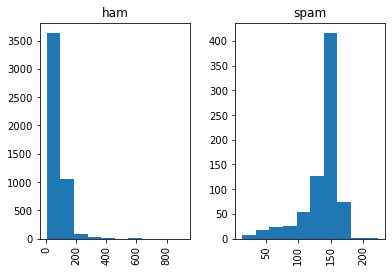

In [11]:
# creating the plot to show how many are spam or normal
data_sms.hist(column = "Length" , by = "Label")
plt.show()

In [12]:
# conver the ham and spam in binery form label incoded
data_sms.loc[:,'Label'] = data_sms.Label.map({'ham':0, 'spam':1})
data_sms.head()

,Label,SMS,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
# check the null values
data_sms.isnull().sum()

Label     0
SMS       0
Length    0
dtype: int64

In [14]:
# Now Download the stop words
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##### Now Create a function to clean the text and return the tokens. The cleaning of the text can be done by first removing punctuation and then removing the useless words also known as stop words.


In [15]:
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [16]:
# to show the tokenization
data_sms['SMS'].head().apply(process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: SMS, dtype: object

In [17]:
# Now convert the text into a matrix of token counts :

from sklearn.feature_extraction.text import CountVectorizer
message = CountVectorizer(analyzer=process).fit_transform(data_sms['SMS'])

In [18]:
#split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(message, data_sms['Label'], test_size=0.20, random_state=0)
# To see the shape of the data
message.shape

(5572, 11304)

#### Now we need to create and train the Multinomial Naive Bayes classifier which is suitable for classification with discrete features.

In [19]:
# create and train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(xtrain, ytrain)

In [20]:
# To see the classifiers prediction and actual values on the data set :
classifier.predict(xtrain)
ytrain.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Now let’s see how well our model performed by evaluating the Naive Bayes classifier and the report, confusion matrix & accuracy score.

In [21]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtrain)
print(classification_report(ytrain, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytrain, pred))
print("Accuracy: \n", accuracy_score(ytrain, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3876
           1       0.98      0.98      0.98       581

    accuracy                           0.99      4457
   macro avg       0.99      0.99      0.99      4457
weighted avg       0.99      0.99      0.99      4457


Confusion Matrix: 
 [[3864   12]
 [  12  569]]
Accuracy: 
 0.9946152120260264


#### It looks like the model used is 99.46% accurate. Let’s test the model on the test data set (xtest &  ytest) by printing the predicted value, and the actual value to see if the model can accurately classify the email text.

In [22]:
#print the predictions
print(classifier.predict(xtest))
#print the actual values
print(ytest.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


### Now let’s evaluate the model on the test data set :

In [23]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtest)
print(classification_report(ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       949
           1       0.81      0.93      0.87       166

    accuracy                           0.96      1115
   macro avg       0.90      0.95      0.92      1115
weighted avg       0.96      0.96      0.96      1115


Confusion Matrix: 
 [[914  35]
 [ 12 154]]
Accuracy: 
 0.957847533632287


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(ytest, pred)))
print('Precision score: {}'.format(precision_score(ytest, pred)))
print('Recall score: {}'.format(recall_score(ytest, pred)))
print('F1 score: {}'.format(f1_score(ytest, pred)))

Accuracy score: 0.957847533632287
Precision score: 0.8148148148148148
Recall score: 0.927710843373494
F1 score: 0.8676056338028169


## The classifier accurately identified the email messages as spam or not spam with 95.78 % accuracy on the test data.

# ------- Thanks By Sumit ---------